In [1]:
import tensorflow
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
data=cifar10.load_data()

In [3]:
(xtrain,ytrain),(xtest,ytest)=data

In [4]:
xtrain.shape

(50000, 32, 32, 3)

In [5]:
xtrain

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
ytrain.shape

(50000, 1)

In [7]:
xtest.shape

(10000, 32, 32, 3)

In [8]:
ytest.shape

(10000, 1)

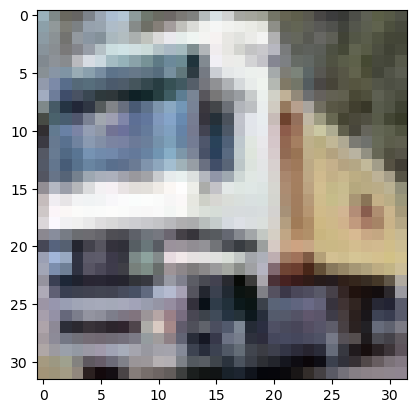

In [9]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[1])

### Model Building

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [11]:
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(units=1000,activation='relu'))
model.add(Dense(units=800,activation='relu'))
model.add(Dense(units=600,activation='relu'))
model.add(Dense(units=400,activation='relu'))
model.add(Dense(units=200,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=10,activation='sigmoid'))

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [13]:
performance=model.fit(xtrain,ytrain,epochs=6,validation_data=(xtest,ytest))

Epoch 1/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 54ms/step - accuracy: 0.2328 - loss: 22.9929 - val_accuracy: 0.2999 - val_loss: 1.9299
Epoch 2/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.3357 - loss: 1.8460 - val_accuracy: 0.3490 - val_loss: 1.8187
Epoch 3/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.3639 - loss: 1.7705 - val_accuracy: 0.3505 - val_loss: 1.7959
Epoch 4/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.3846 - loss: 1.7152 - val_accuracy: 0.4143 - val_loss: 1.6461
Epoch 5/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.3926 - loss: 1.6916 - val_accuracy: 0.3869 - val_loss: 1.6831
Epoch 6/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.4042 - loss: 1.6650 - val_accuracy: 0.3580 - val_loss: 1.7809


In [14]:
performance.history

{'accuracy': [0.2815600037574768,
  0.3450799882411957,
  0.3696799874305725,
  0.3864800035953522,
  0.39320001006126404,
  0.4041999876499176],
 'loss': [5.877035617828369,
  1.821345567703247,
  1.75641667842865,
  1.7172242403030396,
  1.695835828781128,
  1.6699949502944946],
 'val_accuracy': [0.29989999532699585,
  0.3490000069141388,
  0.3504999876022339,
  0.41429999470710754,
  0.38690000772476196,
  0.3580000102519989],
 'val_loss': [1.9298897981643677,
  1.818708062171936,
  1.7959402799606323,
  1.6460973024368286,
  1.6830933094024658,
  1.780859351158142]}

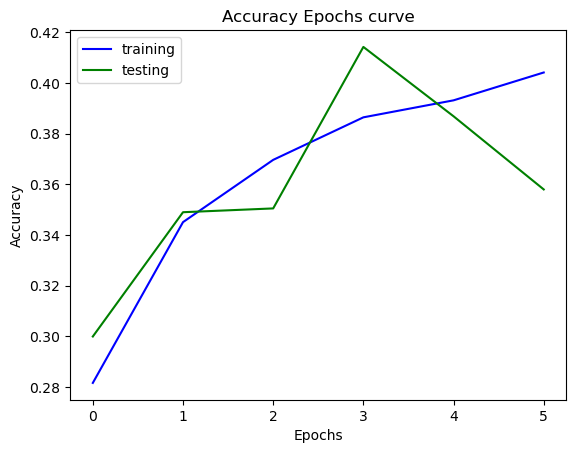

In [15]:
plt.plot(performance.history['accuracy'],color='b',label='training')
plt.plot(performance.history['val_accuracy'],color='g',label='testing')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Epochs curve')

plt.show()